In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

In [2]:
url = "/content/trainstati.csv"

tanggal = ["time_estimated", "destination_time"]

origin = reader(url, parse_dates=tanggal)

origin.iloc[:5, :6]

,id,station_id,train_id,line,route,color
0,AC-2400,AC,2400,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067
1,AC-2401,AC,2401,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067
2,AC-2402,AC,2402,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067
3,AC-2403,AC,2403,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067
4,AC-2404,AC,2404,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067


In [3]:
origin.iloc[:5, 6:]

,destination,time_estimated,destination_time,updated_at,statiun,asal,time
0,TANJUNGPRIUK,2024-06-02 06:07:00,2024-06-02 06:16:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
1,JAKARTAKOTA,2024-06-02 06:34:00,2024-06-02 06:42:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
2,TANJUNGPRIUK,2024-06-02 06:24:00,2024-06-02 06:33:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
3,JAKARTAKOTA,2024-06-02 06:50:00,2024-06-02 06:58:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
4,TANJUNGPRIUK,2024-06-02 06:43:00,2024-06-02 06:52:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0


In [4]:
null = origin.isnull().sum()

null.sum()

0

In [5]:
double = origin.duplicated()

double.sum()

0

In [6]:
assert origin["id"].nunique() == len(origin), "Failed !"

### Line General

In [7]:
origin["line"].nunique()

10

Table ini Memiliki 10 Data Commuter Line

In [8]:
total = origin["line"].value_counts().to_frame().rename(columns={"count": "Total Trip"})

total.index = total.index.str.replace("COMMUTER LINE", "")

total.index = total.index.str.strip()

total.iloc[:5]

,Total Trip
line,
BOGOR,7456
CIKARANG,5203
RANGKASBITUNG,2931
TANGERANG,1230
BST,588


4 Diantaranya : Commuter Line Bogor, Cikarang, Tangerang, BST

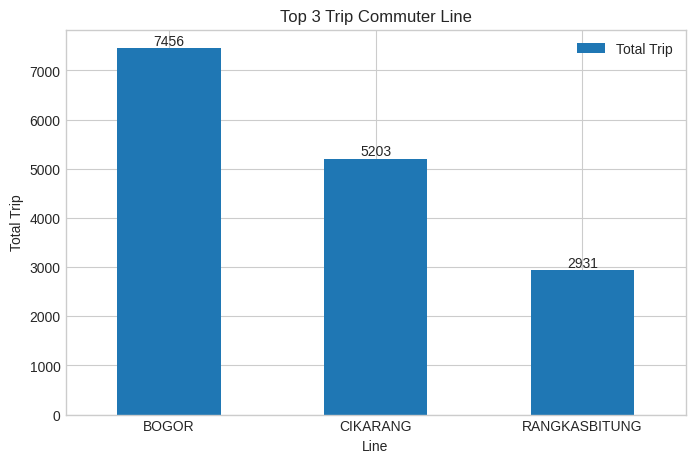

In [9]:
plot = total.iloc[:3].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 3 Trip Commuter Line")

plot.set_xlabel("Line")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

Pada Bar Chart Tersebut, Top 3 Commuter Line Yang Dilewati Adalah : Bogor (7.456), Cikarang (5.203), Rangkas Bitung (2.931)

In [10]:
lito = origin.groupby("line")

router = lito[["route"]].nunique().sort_values("route", ascending=False)

router.index = router.index.str.replace("COMMUTER LINE", "")

router.index = router.index.str.strip()

router.columns = ["Total Route"]

router.iloc[:3]

,Total Route
line,
CIKARANG,25
BOGOR,16
RANGKASBITUNG,15


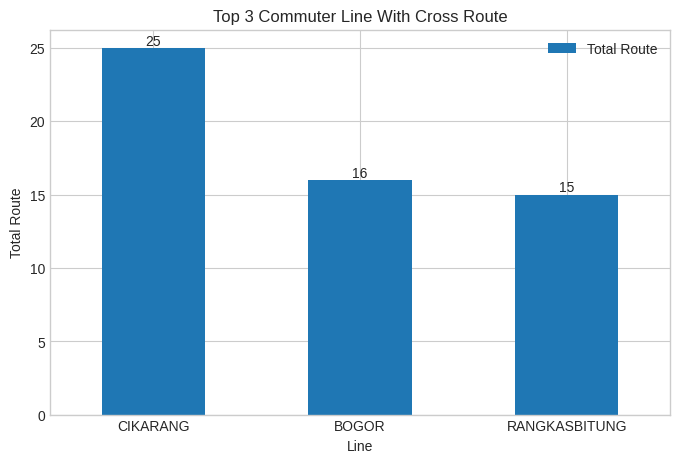

In [11]:
plot = router.iloc[:3].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 3 Commuter Line With Cross Route")

plot.set_xlabel("Line")

plot.set_ylabel("Total Route")

plot.bar_label(plot.containers[0]);

Pada Bar Chart Tersebut, Top 3 Commuter Line Yang Memiliki Total Jumlah Rute Adalah : Cikarang (25), Bogor (16), Rangkas Bitung (15)

In [12]:
total = total.join(router)

total = total.sort_values("Total Trip", ascending=False)

total.iloc[:5]

,Total Trip,Total Route
line,,
BOGOR,7456,16
CIKARANG,5203,25
RANGKASBITUNG,2931,15
TANGERANG,1230,4
BST,588,3


In [13]:
statiun = lito[["statiun"]].nunique().sort_values("statiun", ascending=False)

statiun = statiun.rename(columns={"statiun": "Total Statiun"})

statiun.index = statiun.index.str.replace("COMMUTER LINE", "")

statiun.index = statiun.index.str.strip()

total = total.join(statiun)

total.iloc[:5]

,Total Trip,Total Route,Total Statiun
line,,,
BOGOR,7456,16,26
CIKARANG,5203,25,28
RANGKASBITUNG,2931,15,23
TANGERANG,1230,4,16
BST,588,3,13


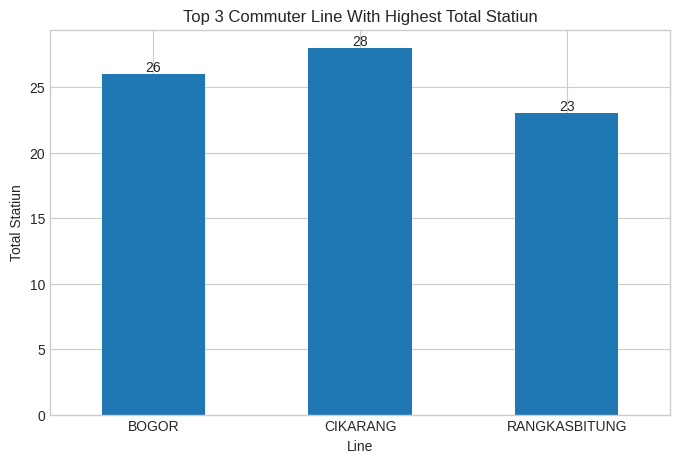

In [14]:
plot = total["Total Statiun"].iloc[:3].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 3 Commuter Line With Highest Total Statiun")

plot.set_xlabel("Line")

plot.set_ylabel("Total Statiun")

plot.bar_label(plot.containers[0]);

Pada Bar Chart Tersebut, Top 3 Commuter Line Yang Memiliki Total Jumlah Statiun Adalah : Cikarang (28), Bogor (26), Rangkas Bitung (23)

### Rute General

In [15]:
origin["route"].nunique()

69

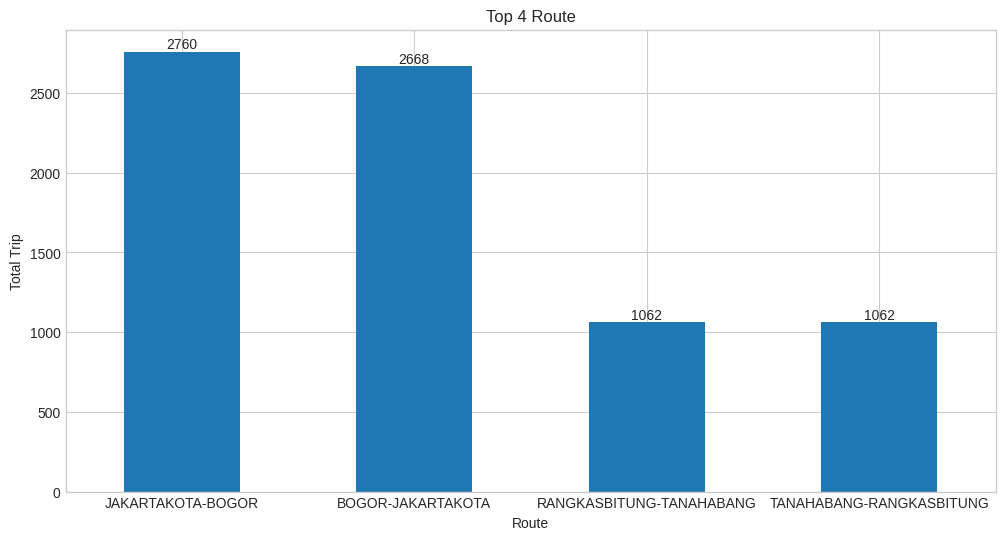

In [16]:
rute = origin["route"].value_counts()

plot = rute.iloc[:4].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 4 Route")

plot.set_xlabel("Route")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

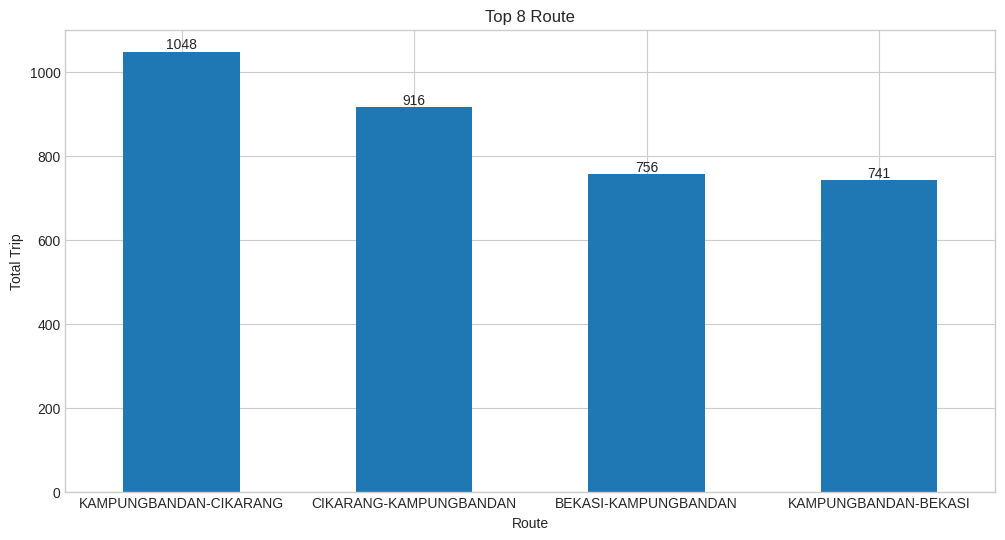

In [17]:
plot = rute.iloc[4:8].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 8 Route")

plot.set_xlabel("Route")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

* Terdapat 4 Rute Dengan Total Trip Terbanyak, Menariknya Perjalanan Pergi dan Pulang Rute Tersebut Selalu Bersebelahan
* Contoh : Jakarta - Bogor (2.760), Diikuti Bogor - Jakarta (2.668)
* 4 Rute Terbanyak : Jakarta - Bogor, Rangkas Bitung - Tanah Abang, Kampung Bandan - Cikarang, Bekasi - Kampung Bandan

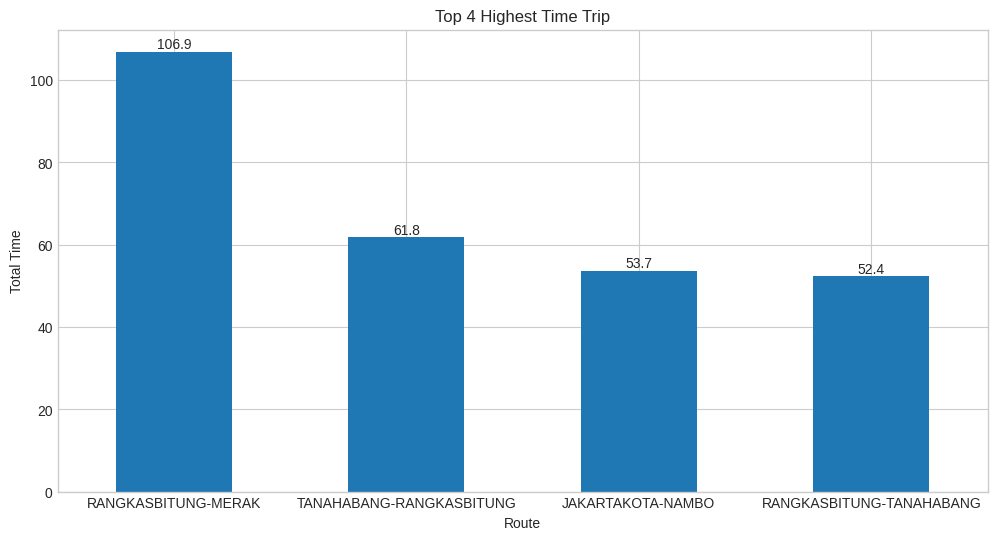

In [18]:
rute = origin.groupby("route")["time"].mean().round(1)

plot = rute.sort_values(ascending=False).iloc[:4].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 4 Highest Time Trip")

plot.set_xlabel("Route")

plot.set_ylabel("Total Time")

plot.bar_label(plot.containers[0]);

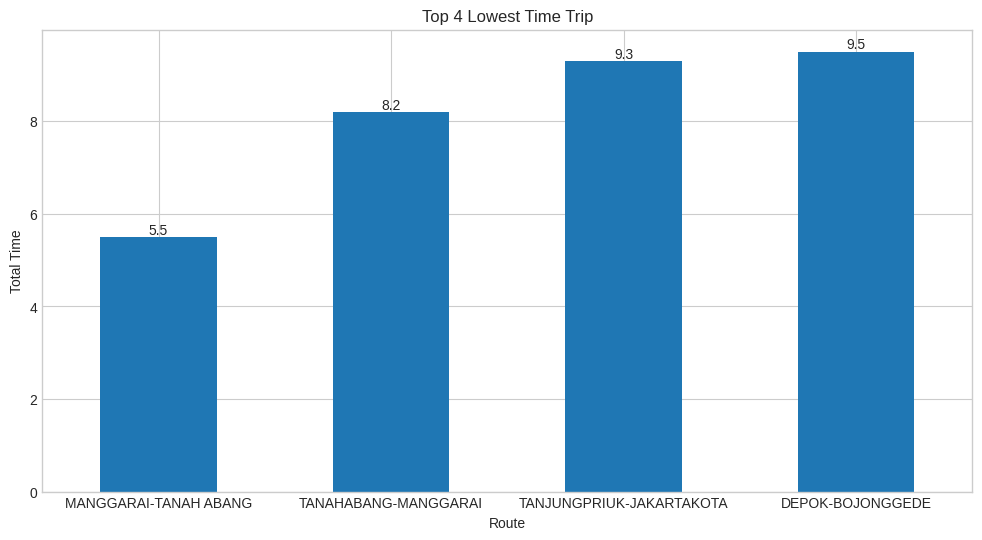

In [19]:
plot = rute.sort_values().iloc[:4].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 4 Lowest Time Trip")

plot.set_xlabel("Route")

plot.set_ylabel("Total Time")

plot.bar_label(plot.containers[0]);

* Menariknya 4 Time Trip Terendah Adalah Perjalanan Dalam Kota, Contohnya : Manggarai - Tanah Abang  
* Sementara 4 Time Trip Terlama Adalah Perjalanan Luar Kota, Contohnya : Tanah Abang - Rangkas Bitung

### Destination General

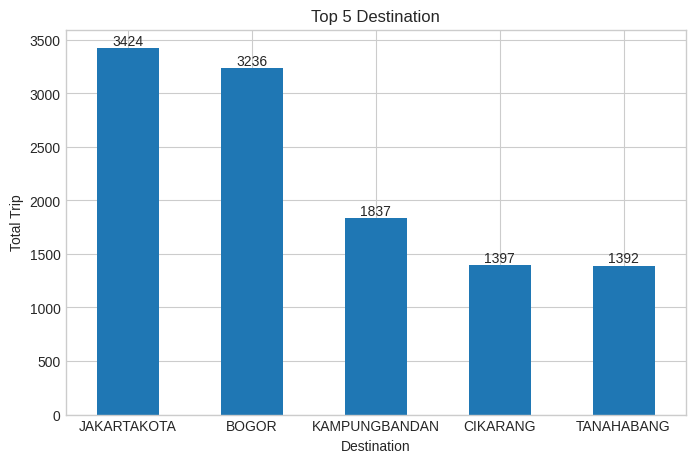

In [20]:
tuju = origin["destination"].value_counts()

plot = tuju.iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Destination")

plot.set_xlabel("Destination")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

* Menariknya, Jakarta, Bogor Menjadi 2 Tujuan Destinasi Tertinggi   
* Hal ini Menunjukkan Kereta Menjadi Transportasi Vital Untuk Area Jabodetabek

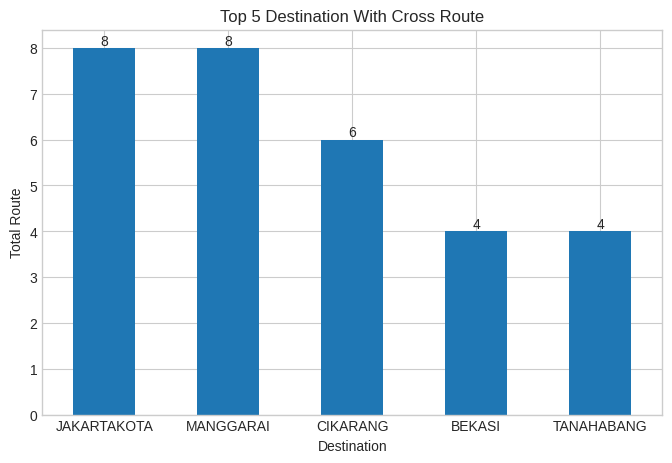

In [21]:
tuju = origin.groupby("destination")["route"].nunique()

plot = tuju.sort_values(ascending=False).iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Destination With Cross Route")

plot.set_xlabel("Destination")

plot.set_ylabel("Total Route")

plot.bar_label(plot.containers[0]);

In [22]:
origin[origin["destination"] == "JAKARTAKOTA"]["route"].unique().tolist()[:3]

['TANJUNGPRIUK-JAKARTAKOTA', 'BOGOR-JAKARTAKOTA', 'BOJONGGEDE-JAKARTAKOTA']

In [23]:
origin[origin["destination"] == "JAKARTAKOTA"]["route"].unique().tolist()[3:6]

['CILEBUT-JAKARTAKOTA', 'CIKARANG-JAKARTAKOTA', 'BEKASI-JAKARTAKOTA']

In [24]:
origin[origin["destination"] == "JAKARTAKOTA"]["route"].unique().tolist()[6:]

['NAMBO-JAKARTAKOTA', 'DEPOK-JAKARTAKOTA']

Terdapat 8 Rute Yang Menuju Jakarta Kota, Dimana Baik itu In atau Out Trip

### Hour General

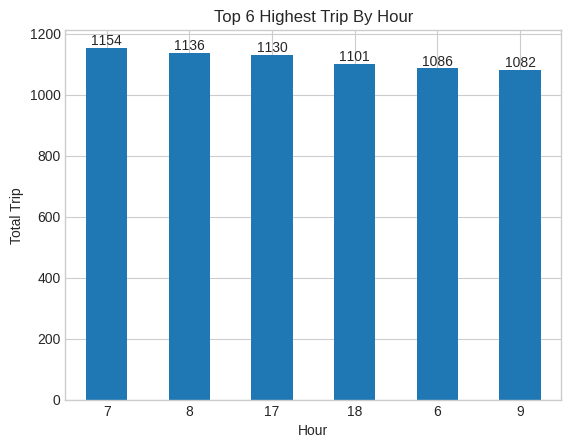

In [25]:
jamly = origin.groupby(origin["time_estimated"].dt.hour)["id"].count()

jamly = jamly.sort_values(ascending=False)

plot = jamly.iloc[:6].plot.bar(rot=0)

plot.set_title("Top 6 Highest Trip By Hour")

plot.set_xlabel("Hour")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

* Pukul 6 s/d 9 A.M Menjadi Jam Tersibuk Pada Pagi Hari (Perjalanan Pergi Kerja / Sekolah)  
* Sementara 17, 18 P.M Menjadi Total Trip Sore Terbanyak (Perjalanan Pulang Kerja / Sekolah)

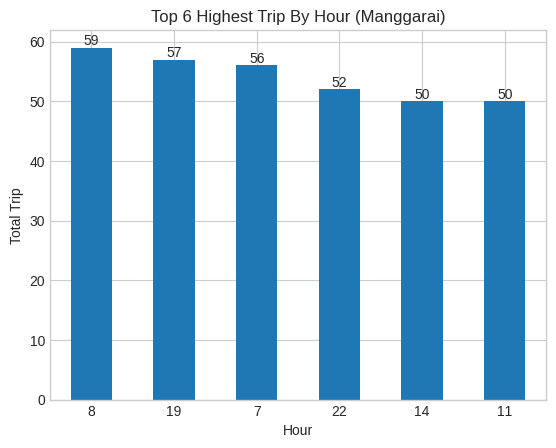

In [26]:
mangga = origin[origin["destination"] == "MANGGARAI"]

jamly = mangga.groupby(origin["time_estimated"].dt.hour)["id"].count()

jamly = jamly.sort_values(ascending=False)

plot = jamly.iloc[:6].plot.bar(rot=0)

plot.set_title("Top 6 Highest Trip By Hour (Manggarai)")

plot.set_xlabel("Hour")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

### Statiun General

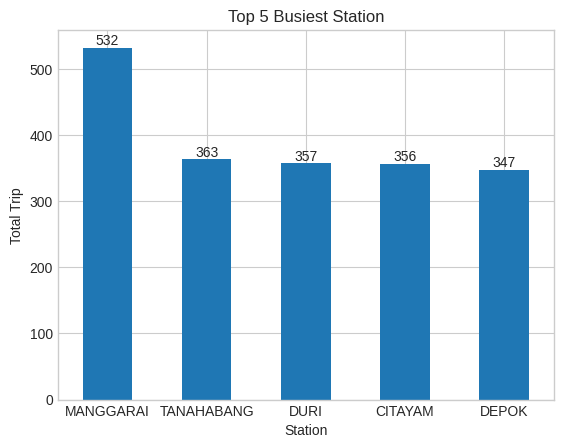

In [27]:
sati = origin["statiun"].value_counts()

plot = sati.iloc[:5].plot.bar(title="Top 5 Busiest Station", rot=0)

plot.set_xlabel("Station")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

Statiun Manggarai Menjadi Statiun Dengan Total Trip Terbanyak (532 Trip)

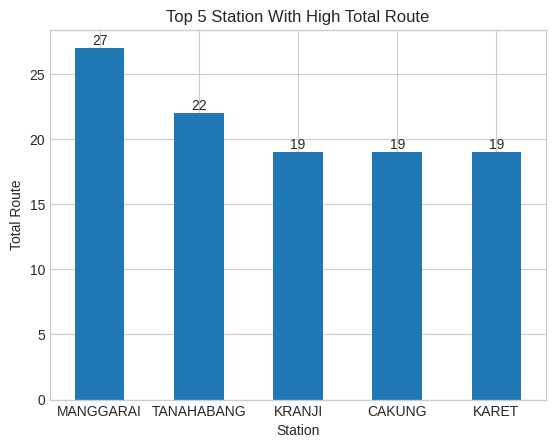

In [28]:
satir = origin.groupby("statiun")["route"].nunique()

title = "Top 5 Station With High Total Route"

plot = satir.sort_values(ascending=False).iloc[:5].plot.bar(title=title, rot=0)

plot.set_xlabel("Station")

plot.set_ylabel("Total Route")

plot.bar_label(plot.containers[0]);

Manggarai Kembali Menjadi Top 1 Urusan Tujuan Statiun, Dimana Terdapat 27 Rute Menuju Manggarai